In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import json
import geopandas as gpd
from pathlib import Path
from shapely.geometry import Point, Polygon, MultiPolygon

In [3]:
path = Path.cwd().parent / "data" / "morocco_shape"

In [4]:

geoms = list()
for file in os.listdir(path):

    data = json.load((path / file).open())

    for d in data['Data']:

        pts = gpd.points_from_xy(np.array(d['Data'])[0], np.array(d['Data'])[1])
        geoms.append(Polygon(pts))

df = gpd.GeoDataFrame(geometry=geoms).set_crs(epsg=4326)

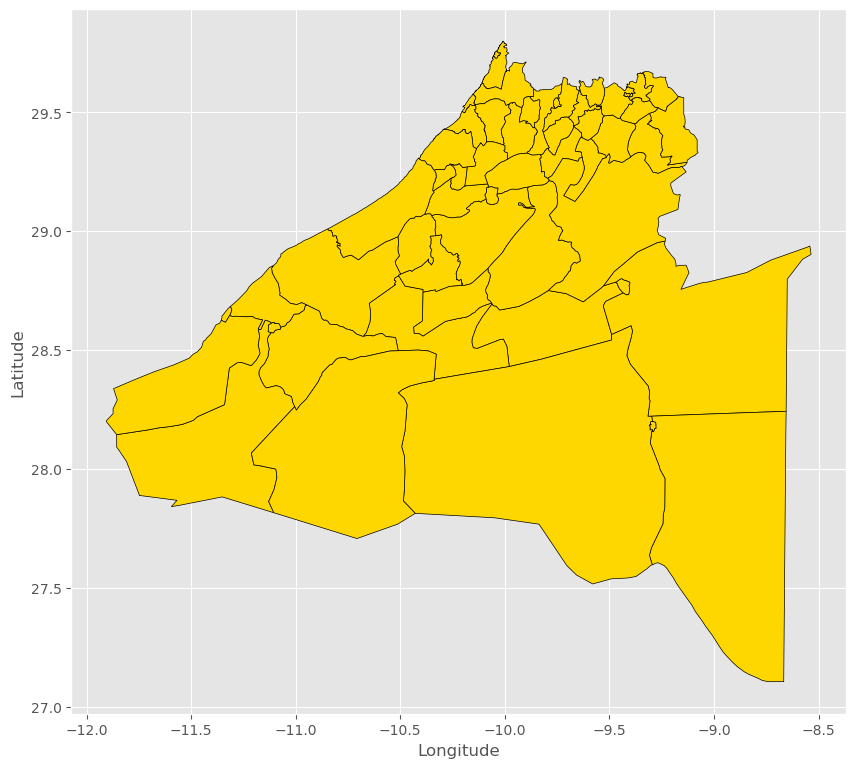

In [12]:
# include this in a plot, label axes
fig, ax = plt.subplots(figsize=(10, 10))
df.plot(ax=ax, color='gold', edgecolor='black')
ax.set(xlabel='Longitude', ylabel='Latitude')
plt.show()

In [6]:
from shapely.ops import cascaded_union

# cascaded_union(df.geometry).bounds
regions = (
    gpd.GeoDataFrame(
        geometry=[cascaded_union(df.geometry)],
        index=["MA0"]
    ).set_crs(epsg=4326).rename_axis("bus")
)
regions["country"] = ["MA"]
regions[["x", "y"]] = regions.geometry.apply(lambda g: pd.Series(g.centroid.coords[0]))

regions

C:\Users\lukas\AppData\Local\Temp\ipykernel_31036\2100535664.py:6: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  geometry=[cascaded_union(df.geometry)],


,geometry,country,x,y
bus,,,,
MA0,"POLYGON ((-10.58469 27.74557, -10.61230 27.736...",MA,-9.980401,28.44358


In [7]:
import xarray as xr

regions = gpd.read_file(Path.cwd().parent / "resources" / "pypsa-fes" / "regions_onshore.geojson")
regions

,name,x,y,country,geometry
0,4780,5.688171,50.729502,BE,"POLYGON ((5.75146 51.17097, 5.78138 51.15241, ..."
1,4783,5.781555,50.670354,BE,"POLYGON ((5.70030 50.64536, 5.77421 50.76206, ..."
2,4784,5.686798,50.561432,BE,"POLYGON ((5.60577 50.64613, 5.70030 50.64536, ..."
3,4785,5.776062,50.464498,BE,"POLYGON ((5.60797 50.39927, 5.79024 50.56712, ..."
4,4786,5.840607,50.369993,BE,"POLYGON ((5.94885 50.51321, 5.90799 50.26534, ..."
...,...,...,...,...,...
1477,6854,16.316071,61.771824,SE,"POLYGON ((15.35219 61.42641, 15.22611 61.53138..."
1478,6907,23.071289,65.938074,SE,"MULTIPOLYGON (((22.16028 68.47667, 22.30306 68..."
1479,6929,19.029694,64.440225,SE,"POLYGON ((17.71054 64.62198, 17.28668 65.62471..."
1480,6931,21.656799,65.826969,SE,"MULTIPOLYGON (((19.67216 66.40494, 20.88866 68..."


In [8]:
onwind = xr.open_dataset(Path.cwd().parent / "resources" / "pypsa-fes" / "profile_morocco_solar.nc")

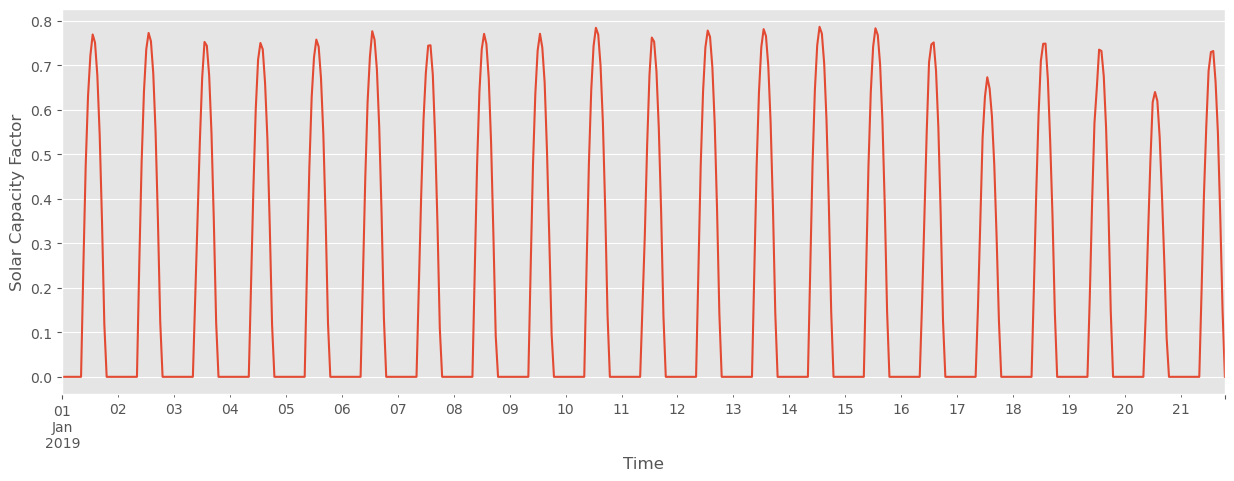

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
onwind.to_dataframe().groupby(level=[0]).mean()["profile"].iloc[:500].plot(ax=ax)

ax.set_ylabel("Solar Capacity Factor")
ax.set_xlabel("Time")

plt.show()